# Sea Level Predictor

## Preview

## Process

Import libraries

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

Use Pandas to import the data from `epa-sea-level.csv`.


In [66]:
df = pd.read_csv("epa-sea-level.csv")
df

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


Use matplotlib to create a scatter plot using the `Year` column as the x-axis and the `CSIRO Adjusted Sea Level` column as the y-axis.

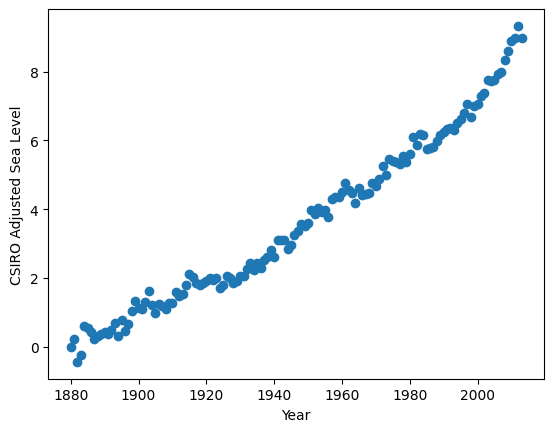

In [63]:
plt.scatter(
    data=df,
    x='Year',
    y='CSIRO Adjusted Sea Level'
)
plt.ylabel("CSIRO Adjusted Sea Level")
plt.xlabel("Year")
plt.show()

Use the `linregress` function from `scipy.stats` to get the slope and y-intercept of the line of best fit. Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050.

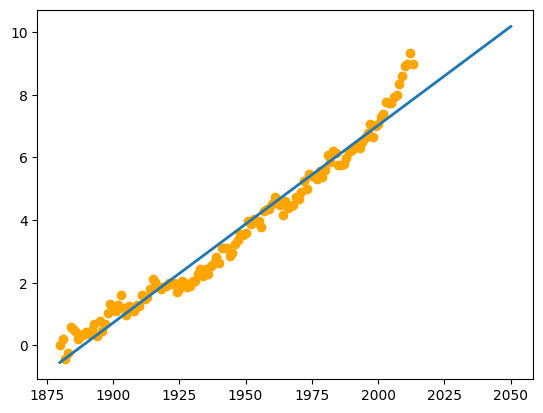

In [64]:
regression = linregress(
    x=df['Year'],
    y=df['CSIRO Adjusted Sea Level']
)
slope = regression.slope
intercept = regression.intercept
predicted = [intercept + slope*y for y in range(1880,2051,1)]
df2 = pd.DataFrame({
    'year':[y for y in range(1880,2051,1)],
    'actual':df['CSIRO Adjusted Sea Level'].reindex([i for i in range(0,2051-1880,1)]),
    'predict': predicted,
})
plt.scatter(df2['year'],df2['actual'],color='orange')
plt.plot(df2['year'],df2["predict"],linewidth=2)
plt.show()


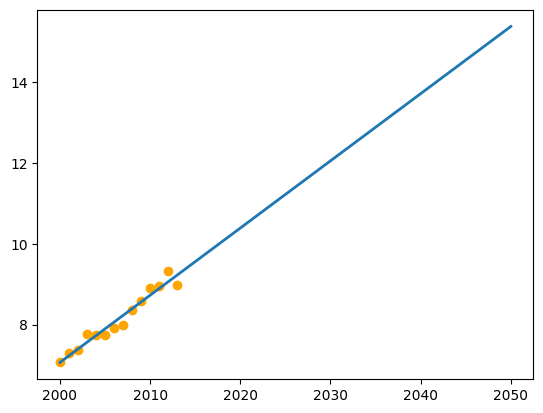

In [91]:
after2000_df = df[df['Year']>=2000].reset_index()
regression2000 = linregress(
    y=after2000_df['CSIRO Adjusted Sea Level']
)
slope2000 = regression2000.slope
intercept2000 = regression2000.intercept
predicted2000 = [intercept2000 + slope2000*y for y in range(2000,2051,1)]

after2000_df2 = pd.DataFrame({
    'year':[y for y in range(2000,2051,1)],
    'actual':after2000_df['CSIRO Adjusted Sea Level'].reindex([i for i in range(51)]),
    'predict': predicted2000,
})
plt.scatter(after2000_df2['year'],after2000_df2['actual'],color='orange')
plt.plot(after2000_df2['year'],after2000_df2["predict"],linewidth=2)
plt.show()

The x label should be `Year`, the y label should be Sea Level `(inches)`, and the title should be `Rise in Sea Level`.